In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import os
from sklearn.model_selection import cross_validate
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from scipy.stats import skew
from scipy.stats import kurtosis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix

import random
np.random.seed(42)
import xgboost as xgb
import seaborn as sns
sns.set()
plt.rcParams["figure.figsize"] = (15, 7)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# READING DATA

In [3]:
classes = pd.read_table('/content/drive/My Drive/doan1/data/profile.txt', header=None)

In [4]:
classes.columns = ['cooler', 'valve', 'pump', 'accumulator' , 'flag']


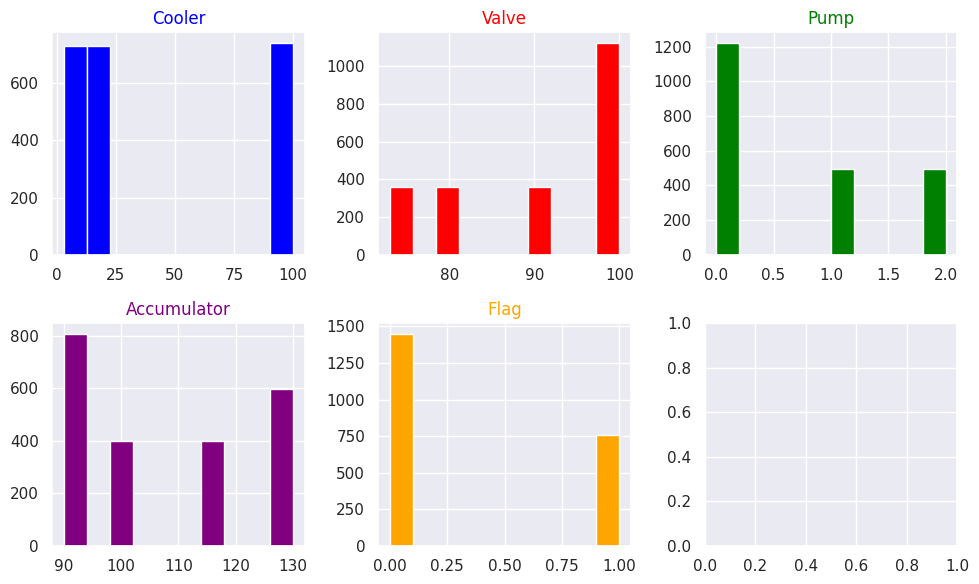

In [5]:
fig, ax = plt.subplots(2, 3, figsize=(10, 6)) # Set the figure size to (10, 6)
ax[0][0].hist(classes['cooler'], color='blue')
ax[0][0].set_title('Cooler', color='blue') # Add a title and set the color to blue
ax[0][1].hist(classes['valve'], color='red')
ax[0][1].set_title('Valve', color='red') # Add a title and set the color to red
ax[0][2].hist(classes['pump'], color='green')
ax[0][2].set_title('Pump', color='green') # Add a title and set the color to green
ax[1][0].hist(classes['accumulator'], color='purple')
ax[1][0].set_title('Accumulator', color='purple') # Add a title and set the color to purple
ax[1][1].hist(classes['flag'], color='orange')
ax[1][1].set_title('Flag', color='orange') # Add a title and set the color to orange
plt.tight_layout() # Automatically adjust subplot parameters to give specified padding
plt.show()


ENCODING CLASS 

In [6]:
#hot encoding for classes
cooler = pd.get_dummies(classes['cooler'])
valve = pd.get_dummies(classes['valve'])
pump = pd.get_dummies(classes['pump'])
accumulator = pd.get_dummies(classes['accumulator'])
flag = pd.get_dummies(classes['flag'],drop_first=True)


# FEATURE ENGINEERING

In [7]:

PS1 = pd.read_table('/content/drive/My Drive/doan1/data/PS1.txt', header=None)
TS1 = pd.read_table('/content/drive/My Drive/doan1/data/TS1.txt', header=None)
SE = pd.read_table('/content/drive/My Drive/doan1/data/SE.txt', header=None)
CP = pd.read_table('/content/drive/My Drive/doan1/data/CP.txt', header=None)


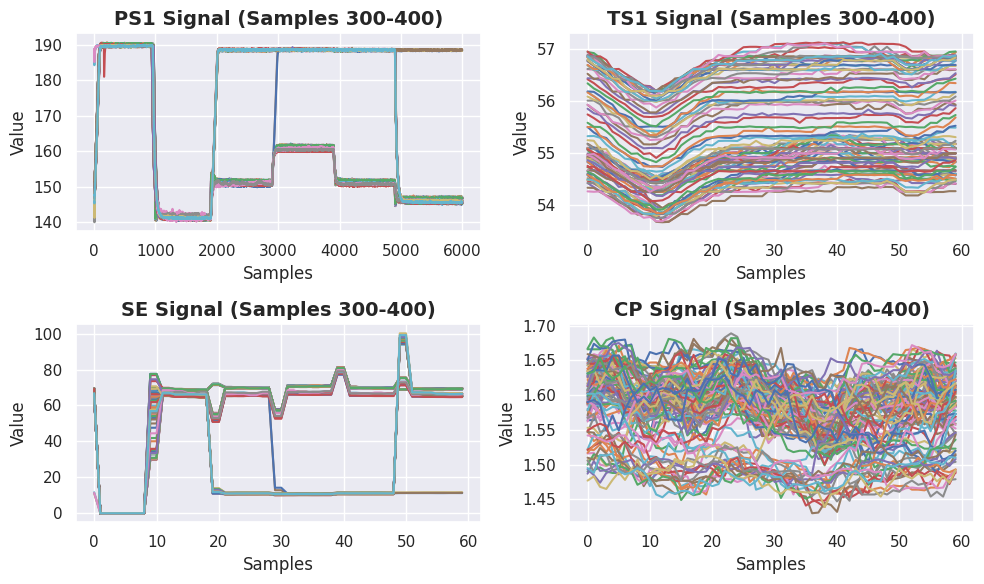

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(10, 6)) # Set the figure size to (10, 6)
ax[0][0].plot(PS1.iloc[300:400].T)
ax[0][0].set_title('PS1 Signal (Samples 300-400)', fontsize=14, fontweight='bold') # Add a title with larger font size and bold weight
ax[0][0].set_xlabel('Samples', fontsize=12) # Add x-axis label with font size 12
ax[0][0].set_ylabel('Value', fontsize=12) # Add y-axis label with font size 12
ax[0][1].plot(TS1.iloc[300:400].T)
ax[0][1].set_title('TS1 Signal (Samples 300-400)', fontsize=14, fontweight='bold') # Add a title with larger font size and bold weight
ax[0][1].set_xlabel('Samples', fontsize=12) # Add x-axis label with font size 12
ax[0][1].set_ylabel('Value', fontsize=12) # Add y-axis label with font size 12
ax[1][0].plot(SE.iloc[300:400].T)
ax[1][0].set_title('SE Signal (Samples 300-400)', fontsize=14, fontweight='bold') # Add a title with larger font size and bold weight
ax[1][0].set_xlabel('Samples', fontsize=12) # Add x-axis label with font size 12
ax[1][0].set_ylabel('Value', fontsize=12) # Add y-axis label with font size 12
ax[1][1].plot(CP.iloc[300:400].T)
ax[1][1].set_title('CP Signal (Samples 300-400)', fontsize=14, fontweight='bold') # Add a title with larger font size and bold weight
ax[1][1].set_xlabel('Samples', fontsize=12) # Add x-axis label with font size 12
ax[1][1].set_ylabel('Value', fontsize=12) # Add y-axis label with font size 12
plt.tight_layout() # Automatically adjust subplot parameters to give specified padding
plt.show()


TIME DOMAIN ANALYSIS

In [9]:
dir_path = '/content/drive/My Drive/doan1/data'
file_list = os.listdir(dir_path)


In [10]:
file_list

['EPS1.txt',
 'FS1.txt',
 'FS2.txt',
 'CE.txt',
 'CP.txt',
 'PS1.txt',
 'PS2.txt',
 'PS3.txt',
 'PS4.txt',
 'PS5.txt',
 'PS6.txt',
 'SE.txt',
 'TS1.txt',
 'TS2.txt',
 'TS3.txt',
 'TS4.txt',
 'VS1.txt',
 'profile.txt',
 'documentation.txt',
 'description.txt']

In [11]:
text_files = [file for file in file_list if file not in ['profile.txt','description.txt','documentation.txt']]


In [12]:
text_files

['EPS1.txt',
 'FS1.txt',
 'FS2.txt',
 'CE.txt',
 'CP.txt',
 'PS1.txt',
 'PS2.txt',
 'PS3.txt',
 'PS4.txt',
 'PS5.txt',
 'PS6.txt',
 'SE.txt',
 'TS1.txt',
 'TS2.txt',
 'TS3.txt',
 'TS4.txt',
 'VS1.txt']

In [13]:
dfs = {}
for file in text_files:
    file_path = os.path.join(dir_path, file)
    df = pd.read_table(file_path,header=None)
    feature = file.rstrip('.txt')
    
    """
    SENSOR data will be deployed using time domain analysis technique, we convert these timeseries data into stastistic feature like mean, max, min ..
    """
    df_ = pd.DataFrame()
    # Compute the mean of the signalz
    df_['mean_x' +'_' + str(feature)] = np.mean(df, axis = 1)

# Compute the variance of the signal
    df_['var_x'+'_' + str(feature)] = np.var(df, axis = 1)

# Compute the standard deviation of the signal
    df_['std_x'+'_' + str(feature)] = np.std(df, axis = 1)

# Compute the minimum and maximum of the signal
    df_['min_x'+'_' + str(feature)] = np.min(df, axis = 1)
    df_['max_x'+'_' + str(feature)] = np.max(df, axis = 1)

# Compute the median of the signal
    df_['median_x'+'_' + str(feature)] = np.median(df, axis = 1)

# Compute the skewness and kurtosis of the signal
    df_['skew_x'+'_' + str(feature)] = skew(df, axis = 1)
    df_['kurt_x'+'_' + str(feature)] = kurtosis(df, axis = 1)
    dfs[feature] = df_

In [14]:
data_train = pd.concat([dfs[df] for df in dfs], axis = 1)

In [15]:
data_train

,mean_x_EPS1,var_x_EPS1,std_x_EPS1,min_x_EPS1,max_x_EPS1,median_x_EPS1,skew_x_EPS1,kurt_x_EPS1,mean_x_FS1,var_x_FS1,...,skew_x_TS4,kurt_x_TS4,mean_x_VS1,var_x_VS1,std_x_VS1,min_x_VS1,max_x_VS1,median_x_VS1,skew_x_VS1,kurt_x_VS1
0,2538.929167,34447.602149,185.600652,2339.8,2951.6,2479.8,1.239186,0.425555,6.709815,9.077651,...,0.247706,-1.391114,0.576950,0.000721,0.026852,0.532,0.624,0.5770,-0.044978,-1.275101
1,2531.498900,36071.224519,189.924260,2332.0,2947.4,2470.0,1.266706,0.423567,6.715315,9.022465,...,-0.305291,-1.065971,0.565850,0.000730,0.027013,0.524,0.626,0.5595,0.770789,-0.238839
2,2519.928000,36374.482363,190.720954,2318.6,2939.8,2457.4,1.270605,0.425694,6.718522,9.070550,...,-0.094572,-1.058555,0.576533,0.001327,0.036422,0.529,0.662,0.5620,0.934103,-0.042351
3,2511.541633,36578.347547,191.254667,2310.8,2929.6,2448.0,1.277350,0.441855,6.720565,9.106258,...,-0.190252,-1.170370,0.569267,0.001101,0.033184,0.527,0.645,0.5550,1.007775,-0.165555
4,2503.449500,36573.667130,191.242430,2301.8,2923.8,2440.6,1.280943,0.454105,6.690308,9.054319,...,-0.181394,-1.163502,0.577367,0.001102,0.033203,0.524,0.660,0.5760,0.795914,0.027945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2543.911033,35161.719038,187.514584,2346.0,2953.2,2481.6,1.271217,0.414707,6.689930,8.994058,...,1.550840,1.468682,0.550833,0.000874,0.029571,0.512,0.618,0.5485,0.941500,0.072164
2201,2543.411333,34986.371592,187.046442,2345.8,2950.8,2481.6,1.251801,0.379837,6.692182,9.019959,...,0.752390,-1.039618,0.547483,0.000453,0.021283,0.507,0.584,0.5425,0.146576,-1.037576
2202,2542.729767,34905.695914,186.830661,2345.8,2949.4,2480.6,1.254341,0.386901,6.693277,8.933160,...,0.401106,-1.491979,0.545233,0.000569,0.023846,0.502,0.597,0.5440,-0.000037,-0.902634
2203,2544.046333,34888.355587,186.784249,2346.0,2951.6,2481.8,1.256689,0.389419,6.684128,9.008871,...,1.051564,-0.375417,0.537017,0.000306,0.017505,0.502,0.585,0.5350,0.116765,-0.312883


DATA MISSING

<Axes: >

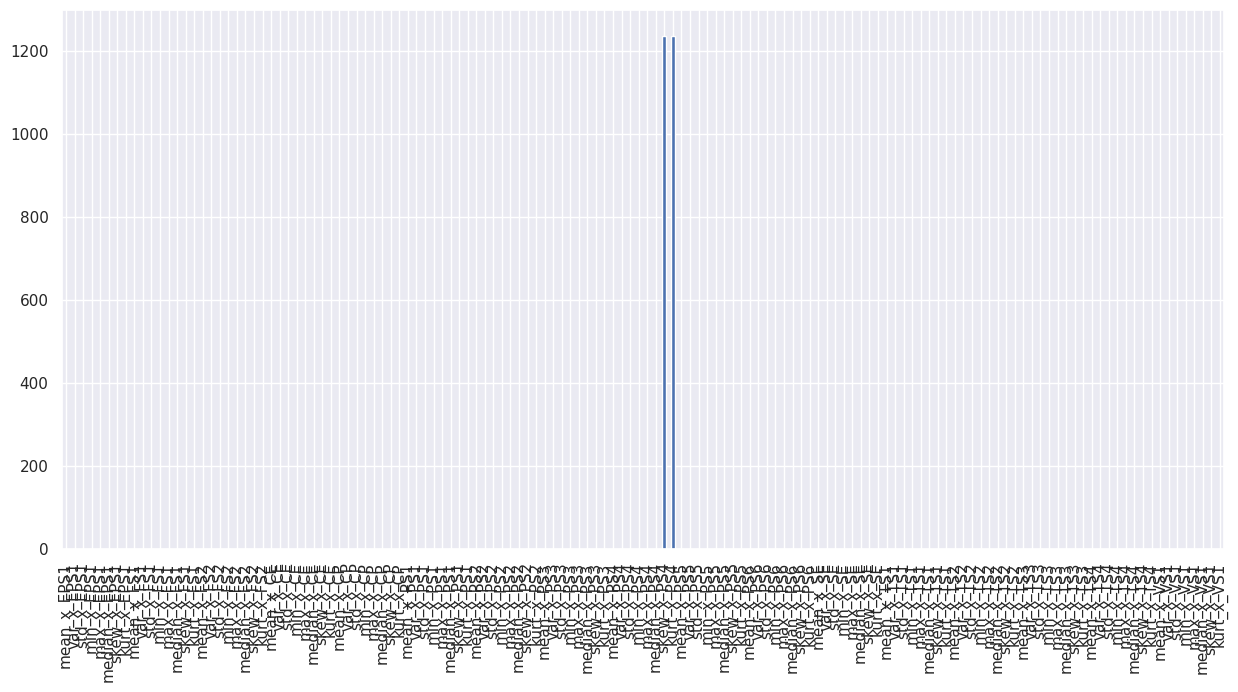

In [16]:
data_train.isna().sum().plot.bar()


In [17]:
#handling missing data 
null_counts = data_train.isna().sum()
check_feature_null = null_counts[null_counts > 1].index.tolist()
check_feature_null

data_train[check_feature_null] = data_train[check_feature_null].fillna(0)

In [18]:
check_feature_null #'skew_x_PS4', 'kurt_x_PS4', these are two feature containing missing values


['skew_x_PS4', 'kurt_x_PS4']

# PCA APPLY

In [19]:
scaler = StandardScaler()
data_train_scaled = scaler.fit_transform(data_train)

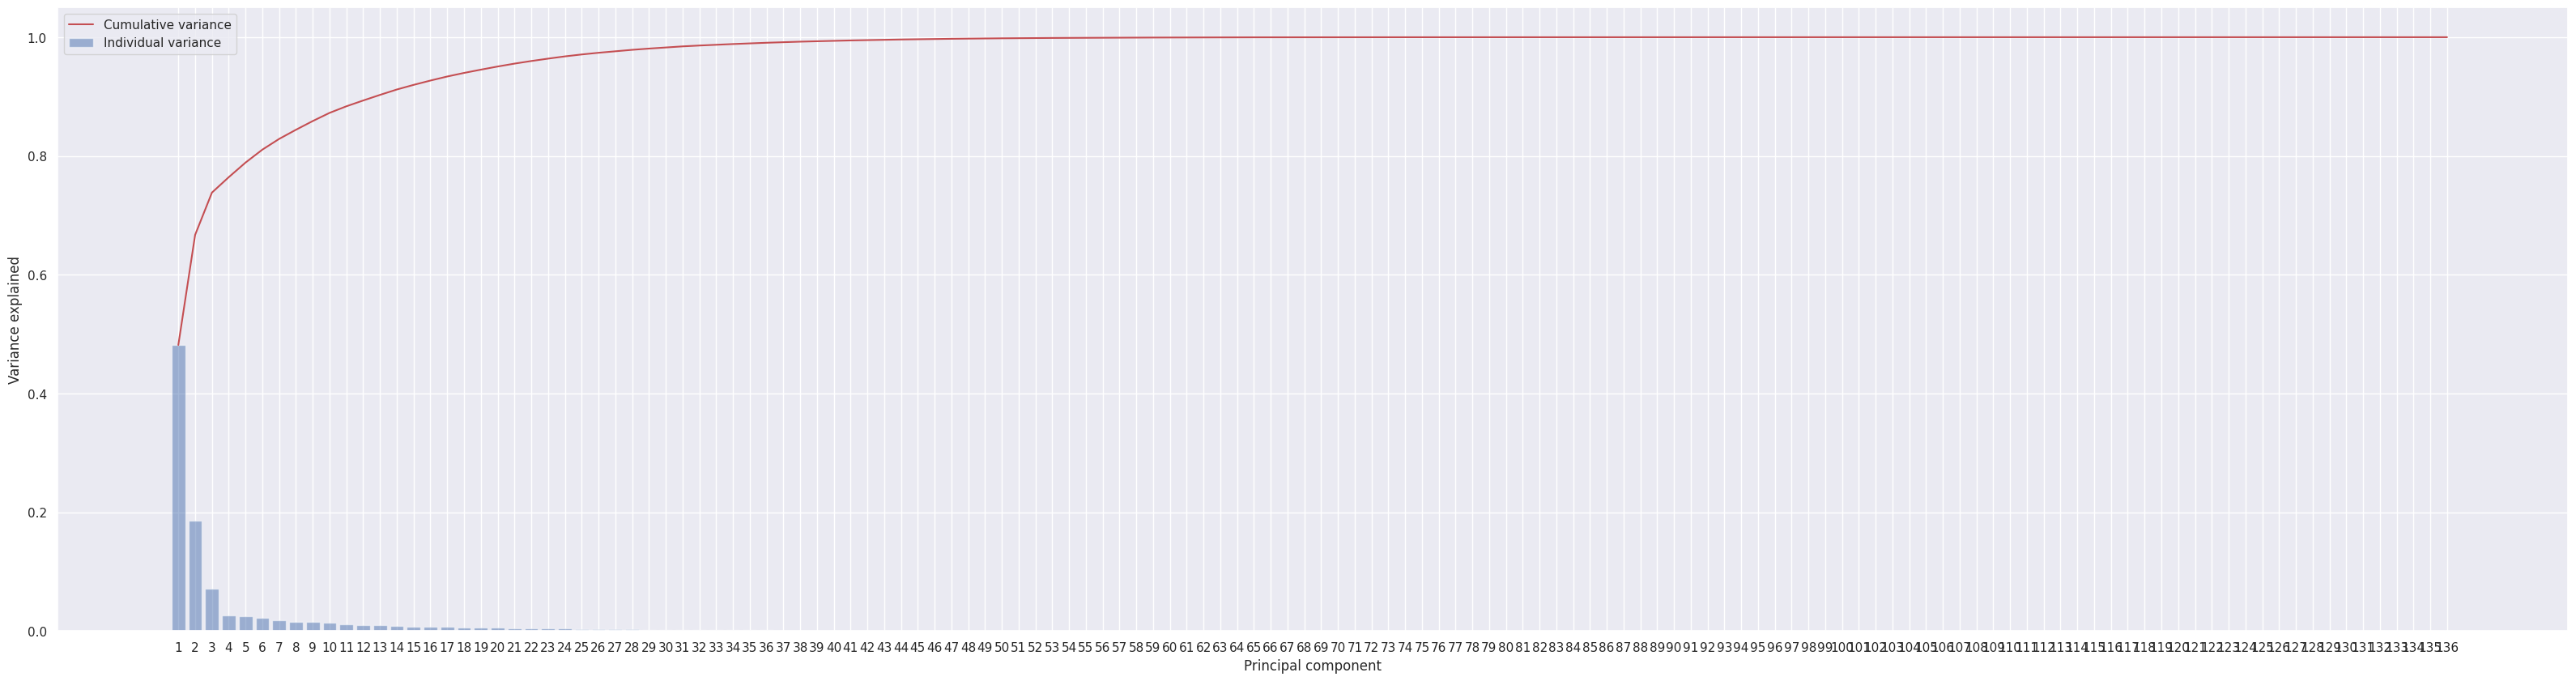

In [20]:
pca = PCA()
X_pca = pca.fit_transform(data_train_scaled)


variance = pca.explained_variance_ratio_

# Plot the variance explained by each principal component
plt.figure(figsize=(40, 10))
plt.bar(range(1, len(variance) + 1), variance, alpha=0.5, align='center', label='Individual variance')
plt.plot(range(1, len(variance) + 1), np.cumsum(variance), c='r', label='Cumulative variance')
plt.ylabel('Variance explained')
plt.xlabel('Principal component')
plt.xticks(range(1, len(variance) + 1))
plt.legend()
plt.show()

In [46]:
n_components = 60
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(data_train_scaled)

In [47]:
def xgb_model(label, max_depth, n_estimators, subsample, colsample_bytree, gamma, reg_alpha, learning_rate, pca=False):
    if pca == True:
        X_scaled = X_pca
    else:
        X_scaled = data_train_scaled

    if label =='flag':
        test_data = pd.get_dummies(classes[label], drop_first=True)
    else:
        test_data = pd.get_dummies(classes[label])
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, test_data, test_size=0.2, random_state=42, stratify=test_data)

    model = xgb.XGBClassifier()

    # param_grid = {
    #     'max_depth': [3, 4, 5],
    #     'n_estimators': [50, 100],
    #     'subsample': [0.5, 0.7],
    #     'colsample_bytree': [0.5, 0.7],
    #     'gamma': [0, 0.1, 0.2],
    #     'reg_alpha': [0, 0.1, 0.2],
    #     'learning_rate': [0.01, 0.1, 0.3]
    # }
    param_grid = {
        'max_depth': max_depth,
        'n_estimators': n_estimators,
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'gamma': gamma,
        'reg_alpha': reg_alpha,
        'learning_rate': learning_rate
    }
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    if label == 'flag':
        validation_score = f1_score(y_test, best_model.predict(X_test), average='micro')
        training_score = f1_score(y_train, best_model.predict(X_train), average='micro')
    else:
        validation_score = f1_score(y_test, best_model.predict(X_test), average='macro')
        training_score = f1_score(y_train, best_model.predict(X_train), average='macro')

    print("Training score:", training_score)
    print("Validation score:", validation_score)


In [23]:
def svm_model(label, c, gamma, pca=False):
     if pca == True:
        X_scaled = X_pca
     else:
        X_scaled = data_train_scaled
     encoder = LabelEncoder()
     y_encoding = encoder.fit_transform(classes[label])
     X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoding, test_size=0.2, random_state=42, stratify=y_encoding)
     param_grid = {'C': c, 'gamma': gamma}
     grid = GridSearchCV(SVC(kernel='rbf',decision_function_shape='ovo'), param_grid, cv=5,scoring='accuracy')
     grid.fit(X_train, y_train)
     print("Best parameters: ", grid.best_params_)
     svm = SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'],decision_function_shape='ovo')
     model = svm.fit(X_train, y_train)
     trainning_score = f1_score(y_train, model.predict(X_train),average='macro')
     validation_score = f1_score(y_test, model.predict(X_test),average='macro')

     print("Training score:", trainning_score)
     print("Validation Score", validation_score)

In [24]:
def svm_model_cross_validation(label):
     scaler = StandardScaler()
     X_scaled = scaler.fit_transform(data_train)
     encoder = LabelEncoder()
     y_encoding = encoder.fit_transform(classes[label])
     X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoding, test_size=0.2, random_state=20, stratify=y_encoding)
     param_grid = {'C': [0.01,0.1, 1, 10], 'gamma': [0.001]}
     grid = GridSearchCV(SVC(kernel='rbf',decision_function_shape='ovo'), param_grid, cv=5)
     grid.fit(X_train, y_train)
     print("Best parameters: ", grid.best_params_)
     svm = SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'],decision_function_shape='ovo')
     scores= cross_validate(svm, X_train, y_train, cv=5, scoring=['accuracy'], return_train_score=True)
     print("Training accuracy for each fold: ", scores['train_accuracy'])
     print("Validation accuracy for each fold: ", scores['test_accuracy'])
     #trainning_score = f1_score(y_train, svm.predict(X_train),average='macro')
     #validation_score = f1_score(y_test, svm.predict(X_test),average='macro')

     print("Training score:", trainning_score)
     print("Validation Score", validation_score)

# SVM

In [25]:
svm_model('flag',[5,10,20,50],[0.008,0.01,0.05,0.1,1])

Best parameters:  {'C': 50, 'gamma': 0.01}
Training score: 0.9962174278509386
Validation Score 0.9697876227449189


In [26]:
svm_model('flag',[50],[0.01], pca=True)

Best parameters:  {'C': 50, 'gamma': 0.01}
Training score: 0.9962174278509386
Validation Score 0.9672177080414682


In [27]:
svm_model('pump',[0.5,1,10,20],[0.01,0.02,0.1,1])

Best parameters:  {'C': 20, 'gamma': 0.01}
Training score: 1.0
Validation Score 0.9898466692436542


In [28]:
svm_model('pump',[20],[0.01], pca=True)

Best parameters:  {'C': 20, 'gamma': 0.01}
Training score: 1.0
Validation Score 0.9898466692436542


In [29]:
svm_model('accumulator',[2,10,20,50],[0.008,0.01,0.05,0.1,1])

Best parameters:  {'C': 50, 'gamma': 0.008}
Training score: 1.0
Validation Score 0.939170770632456


In [30]:
svm_model('accumulator',[50],[0.008], pca=True)

Best parameters:  {'C': 50, 'gamma': 0.008}
Training score: 0.9976488970452754
Validation Score 0.9238935322829201


In [31]:
svm_model('cooler',[0.08, 0.5,1],[0.08,1])

Best parameters:  {'C': 1, 'gamma': 0.08}
Training score: 1.0
Validation Score 0.979742003409963


In [32]:
svm_model('cooler',[1],[0.08],pca=True)

Best parameters:  {'C': 1, 'gamma': 0.08}
Training score: 1.0
Validation Score 0.9819823934510906


In [33]:
svm_model('valve',[5,10,50],[0.001, 0.01,0.1])

Best parameters:  {'C': 50, 'gamma': 0.01}
Training score: 1.0
Validation Score 0.9326577056846449


In [34]:
svm_model('valve',[50],[0.01])

Best parameters:  {'C': 50, 'gamma': 0.01}
Training score: 1.0
Validation Score 0.9326577056846449


# XGBOOST

In [44]:
xgb_model('valve',max_depth= [4],n_estimators = [75], subsample= [0.4],colsample_bytree=[0.4],gamma=[0.1],reg_alpha=[0.5], learning_rate=[0.001])

Training score: 0.9905432848765834
Validation score: 0.9918165278870066


In [66]:
xgb_model('valve',max_depth= [5],n_estimators = [200], subsample= [0.4],colsample_bytree=[0.7],gamma=[0.1],reg_alpha=[0.5], learning_rate=[0.001], pca=True)

Training score: 0.73567355995536
Validation score: 0.5947246352354537


In [50]:
xgb_model('cooler',max_depth= [4],n_estimators = [75], subsample= [0.4],colsample_bytree=[0.4],gamma=[0.1],reg_alpha=[0.5], learning_rate=[0.001])

Training score: 0.998584401250855
Validation score: 1.0


In [51]:
xgb_model('cooler',max_depth= [4],n_estimators = [75], subsample= [0.4],colsample_bytree=[0.4],gamma=[0.1],reg_alpha=[0.5], learning_rate=[0.001], pca=True)

Training score: 0.997438027746918
Validation score: 0.9931661900237542


In [59]:
xgb_model('accumulator',max_depth= [5],n_estimators = [200], subsample= [0.6],colsample_bytree=[0.4],gamma=[0.1],reg_alpha=[0.5], learning_rate=[0.001])

Training score: 0.951120731609113
Validation score: 0.9035269502548995


In [60]:
xgb_model('accumulator',max_depth= [5],n_estimators = [200], subsample= [0.6],colsample_bytree=[0.4],gamma=[0.1],reg_alpha=[0.5], learning_rate=[0.001], pca=True)

Training score: 0.6463840632398106
Validation score: 0.5135093332101353


In [61]:
xgb_model('flag',max_depth= [5],n_estimators = [200], subsample= [0.6],colsample_bytree=[0.4],gamma=[0.1],reg_alpha=[0.5], learning_rate=[0.001])

Training score: 0.9829931972789115
Validation score: 0.9705215419501134


In [62]:
xgb_model('flag',max_depth= [5],n_estimators = [200], subsample= [0.6],colsample_bytree=[0.4],gamma=[0.1],reg_alpha=[0.5], learning_rate=[0.001], pca=True)

Training score: 0.9308390022675737
Validation score: 0.9251700680272109


ADD NOISE DATA EXPERIENCE

In [ ]:
jitter_std = 0.1 # Adjust this value to control the amount of jitter.
def add_jitter(data):
    #Add random jitter 
    jitter = np.random.normal(0, data.mean()*0.01, data.shape)    
    return data + jitter

In [ ]:
def permutation(data):
 
    
 
    permuted_data = np.random.permutation(data)
    return permuted_data

In [ ]:
def scale_data(data):
    return data*np.random.uniform(0.9, 0.99, len(data))

In [ ]:
PS1 = pd.read_table('/content/drive/My Drive/doan1/data/PS1.txt', header=None)

In [ ]:
PS1.describe()

In [ ]:
plt.plot(PS1.iloc[300:301].T);


In [ ]:
plt.plot(add_jitter(PS1.iloc[300:301].T));


In [ ]:
 samples=list(np.arange(len(PS1)))

In [ ]:
sample_add_jitter = random.sample(samples, 400)
sample_add_jitter.sort()

In [ ]:
sample_permutation = random.sample(samples,150)
sample_permutation.sort()

In [ ]:
sample_scale = random.sample(samples, 100)
sample_scale.sort()

In [ ]:
PS1.iloc[sample_add_jitter]

In [ ]:
PS1.iloc[sample_add_jitter].apply(add_jitter, axis=1)

In [ ]:
text_files

In [ ]:
data = np.arange(20) 
permutation(data)

In [ ]:
 def data_processing_add_noise():
    dfs = {}
    for file in text_files:
        file_path = os.path.join(dir_path, file)
        df = pd.read_table(file_path,header=None)
        feature = file.rstrip('.txt')
        df = df.iloc[sample_add_jitter].apply(add_jitter, axis=1)
        df_ = pd.DataFrame()
        # Compute the mean of the signalz
        df_['mean_x' +'_' + str(feature)] = np.mean(df, axis = 1)
        
    # Compute the variance of the signal
        df_['var_x'+'_' + str(feature)] = np.var(df, axis = 1)

    # Compute the standard deviation of the signal
        df_['std_x'+'_' + str(feature)] = np.std(df, axis = 1)

    # Compute the minimum and maximum of the signal
        df_['min_x'+'_' + str(feature)] = np.min(df, axis = 1)
        df_['max_x'+'_' + str(feature)] = np.max(df, axis = 1)

    # Compute the median of the signal
        df_['median_x'+'_' + str(feature)] = np.median(df, axis = 1)

    # Compute the skewness and kurtosis of the signal
        df_['skew_x'+'_' + str(feature)] = skew(df, axis = 1)
        df_['kurt_x'+'_' + str(feature)] = kurtosis(df, axis = 1)
        dfs[feature] = df_
    return dfs

In [ ]:
 def data_processing_permutation():
    dfs = {}
    for file in text_files:
        file_path = os.path.join(dir_path, file)
        df = pd.read_table(file_path,header=None)
        feature = file.rstrip('.txt')
        df = df.iloc[sample_permutation]
        df = df.iloc[:, np.random.permutation(df.shape[1])] 
        df_ = pd.DataFrame()
        # Compute the mean of the signalz
        df_['mean_x' +'_' + str(feature)] = np.mean(df, axis = 1)
        
    # Compute the variance of the signal
        df_['var_x'+'_' + str(feature)] = np.var(df, axis = 1)

    # Compute the standard deviation of the signal
        df_['std_x'+'_' + str(feature)] = np.std(df, axis = 1)

    # Compute the minimum and maximum of the signal
        df_['min_x'+'_' + str(feature)] = np.min(df, axis = 1)
        df_['max_x'+'_' + str(feature)] = np.max(df, axis = 1)

    # Compute the median of the signal
        df_['median_x'+'_' + str(feature)] = np.median(df, axis = 1)

    # Compute the skewness and kurtosis of the signal
        df_['skew_x'+'_' + str(feature)] = skew(df, axis = 1)
        df_['kurt_x'+'_' + str(feature)] = kurtosis(df, axis = 1)
        dfs[feature] = df_
    return dfs

In [ ]:
def data_processing_scale():
    dfs = {}
    for file in text_files:
        file_path = os.path.join(dir_path, file)
        df = pd.read_table(file_path,header=None)
        feature = file.rstrip('.txt')
        df = df.iloc[sample_scale].apply(scale_data, axis=1)
        df_ = pd.DataFrame()
      
        # Compute the mean of the signalz
        df_['mean_x' +'_' + str(feature)] = np.mean(df, axis = 1)
        
    # Compute the variance of the signal
        df_['var_x'+'_' + str(feature)] = np.var(df, axis = 1)

    # Compute the standard deviation of the signal
        df_['std_x'+'_' + str(feature)] = np.std(df, axis = 1)

    # Compute the minimum and maximum of the signal
        df_['min_x'+'_' + str(feature)] = np.min(df, axis = 1)
        df_['max_x'+'_' + str(feature)] = np.max(df, axis = 1)

    # Compute the median of the signal
        df_['median_x'+'_' + str(feature)] = np.median(df, axis = 1)

    # Compute the skewness and kurtosis of the signal
        df_['skew_x'+'_' + str(feature)] = skew(df, axis = 1)
        df_['kurt_x'+'_' + str(feature)] = kurtosis(df, axis = 1)
        dfs[feature] = df_
    return dfs

In [ ]:
dfs_add_noise = data_processing_add_noise()
dfs_permutation = data_processing_permutation()
dfs_scale = data_processing_scale() 

In [ ]:
data_train_add_noise = pd.concat([dfs_add_noise[df] for df in dfs_add_noise], axis = 1)
data_train_permutation = pd.concat([dfs_permutation[df] for df in dfs_permutation], axis = 1)
data_train_scale = pd.concat([dfs_scale[df] for df in dfs_scale], axis = 1)

In [ ]:
data_train_augumentation = pd.concat([data_train,data_train_add_noise, data_train_permutation,data_train_scale ],axis = 0)

In [ ]:
data_train_augumentation.reset_index(drop=True, inplace = True)

In [ ]:
data_train_augumentation

In [ ]:
null_counts = data_train_augumentation.isna().sum()
check_feature_null = null_counts[null_counts > 1].index.tolist()
check_feature_null

data_train_augumentation[check_feature_null] = data_train_augumentation[check_feature_null].fillna(0)

In [ ]:
classes_add_noise = pd.concat([classes,classes.iloc[sample_add_jitter], classes.iloc[sample_permutation],classes.iloc[sample_scale]],axis = 0)

In [ ]:
classes_add_noise.reset_index(drop=True, inplace = True)

In [ ]:
classes_add_noise

1D CNN